# The Green Mirage: Uncovering the Blueprint of a Resilient City
When you walk down the street of some of the most modern cities, you will feel the tension even before you see it: the friction of frantic needs versus terrified realization of everyone's suffocation in concrete. Every major city is attempting to resolve this paradox: how to create a space bustling and dense enough to fire an economy, yet at the same time sustain human life. Resilient to a volatile climate, city planners are given meager budgets and expected to make miracles.

For the late-night spreadsheet planners now burdened with these decisions, their own nightmare, "sustainability". It is a logistical mess. There are a multitude of questions and very few answers to keep one awake at night. Is the carbon saving from a new bike lane really worth the environemtnal damage from high density zoning? Or is the real answer hiding in the energy grid instead of the square feet of green space? We are so accustomed to throwing around sustainability as a marketing tool that we should just start treating it like a math problem.

To get to the truth, we are bypassing the political rhetoric and going straight to the source. In this notebook, we are cracking open the **Sustainable Urban Planning & Landscape Dataset**. Consider this our evidence locker. We are not here to simply find interesting correlations to put on a slide deck; we are looking for a blueprint. **Our objective is to cut through the noise and identify the invisible levers—the specific, quantifiable factors—that separate a functional, truly green city from the ones that are merely pretending.**

Our investigation begins here. We shall take an investigatory walk through the urban landscape, starting with the infrastructure and land-use raw choices that form the skeleton of a city. Then we shall strip away the outliers and noise to reveal what factors truly predict better environmental outcomes. Whether you are a policy nerd, a city planner, or just a guy concerned about the future of where he lives, understanding these patterns is the first step toward survival. Something to watch, Let's see what the numbers have to say.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# For visualization
import plotly.express as px
import plotly.graph_objects as go

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 3, Finished, Available, Finished)

Libraries imported successfully


# Vetting the Evidence
One must first make this foundation solid before settling any conclusions.

For any data scientist, the golden rule stands as garbage in, garbage out. On whatever model you put the best technology, if the data you feed into the model has so many missing entries, duplicates, and errors, then the output value at every instance would not make sense.

It's not going to be blindly trusting data. Here, we are going to "interrogate" this dataset. We're going to check for gaps; hunt down inconsistencies; infer whether every row and column is reliable enough to base our predictions on. 
Just give it a quick sanity check.

In [2]:
path = "Files/urban_planning_dataset.csv"
urban_df = spark.read.csv(path, header=True, inferSchema=True).toPandas()
print("Dataset loaded successfully")
print(f"Shape: {urban_df.shape[0]} rows × {urban_df.shape[1]} columns")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 4, Finished, Available, Finished)

Dataset loaded successfully
Shape: 3476 rows × 16 columns


In [3]:
# First look at the data
display(urban_df.head(10))

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f233ea52-4612-447b-815b-ef2019a49577)

In [4]:
# Basic information
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"\nDimensions: {urban_df.shape[0]} rows × {urban_df.shape[1]} columns")
print(f"\nColumn Names:")
print(urban_df.columns.tolist())
print(f"\nData Types:")
print(urban_df.dtypes)
print(f"\nMemory Usage: {urban_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 6, Finished, Available, Finished)

DATASET OVERVIEW

Dimensions: 3476 rows × 16 columns

Column Names:
['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']

Data Types:
building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial      float64
land_use_type_Green Space     float64
land_use_type_Industrial      float64
land_use

In [5]:
# Statistical summary
display(urban_df.describe(include='all').T)

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 01e5ab46-1cb0-44a2-bced-58ab4e905885)

In [6]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': urban_df.columns,
    'Missing_Count': urban_df.isnull().sum(),
    'Missing_Percentage': (urban_df.isnull().sum() / len(urban_df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("Columns with missing values:")
    display(missing_data)
else:
    print("No missing values found!")

print(f"Total missing values: {urban_df.isnull().sum().sum()}")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 8, Finished, Available, Finished)

MISSING VALUES ANALYSIS
No missing values found!
Total missing values: 0


StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 9, Finished, Available, Finished)

TARGET VARIABLE: URBAN SUSTAINABILITY SCORE
Statistical Summary:
count    3476.000000
mean        0.482871
std         0.169391
min         0.000000
25%         0.360202
50%         0.482517
75%         0.606625
max         1.000000
Name: urban_sustainability_score, dtype: float64




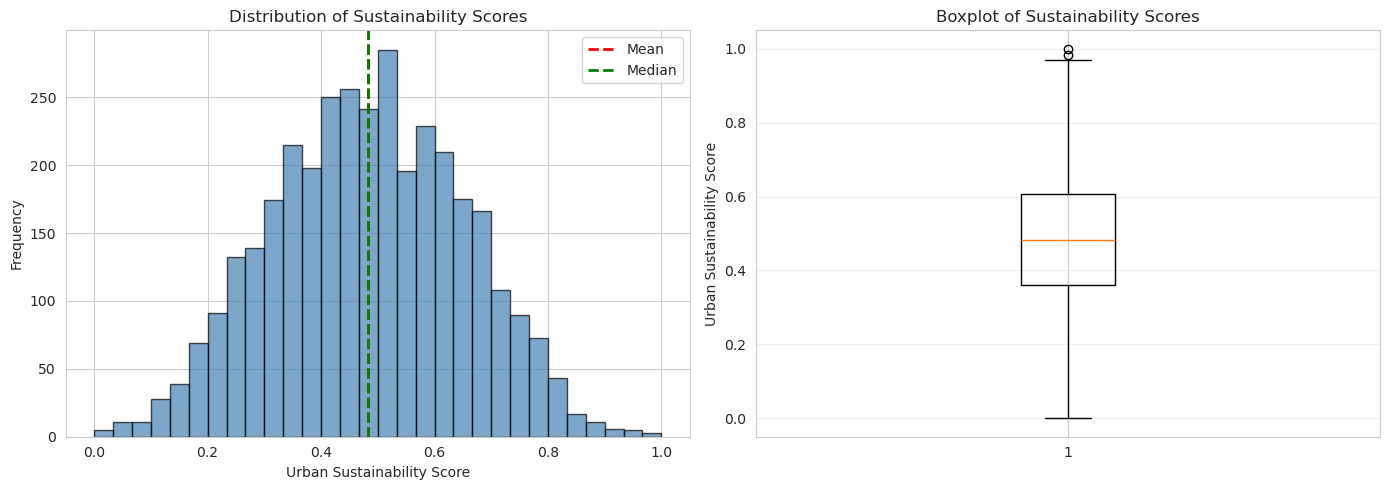



Score Range: 0.00 to 1.00
Score Spread (Std Dev): 0.17


In [7]:
# Examine our target variable: urban_sustainability_score
print("=" * 60)
print("TARGET VARIABLE: URBAN SUSTAINABILITY SCORE")
print("=" * 60)

print("Statistical Summary:")
print(urban_df['urban_sustainability_score'].describe())
print("\n")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(urban_df['urban_sustainability_score'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Urban Sustainability Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sustainability Scores')
axes[0].axvline(urban_df['urban_sustainability_score'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(urban_df['urban_sustainability_score'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(urban_df['urban_sustainability_score'], vert=True)
axes[1].set_ylabel('Urban Sustainability Score')
axes[1].set_title('Boxplot of Sustainability Scores')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n")
print(f"Score Range: {urban_df['urban_sustainability_score'].min():.2f} to {urban_df['urban_sustainability_score'].max():.2f}")
print(f"Score Spread (Std Dev): {urban_df['urban_sustainability_score'].std():.2f}")

In [8]:
# Detect outliers using IQR method for all numeric columns
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

outlier_summary = []

for col in urban_df.columns:
    Q1 = urban_df[col].quantile(0.25)
    Q3 = urban_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = urban_df[(urban_df[col] < lower_bound) | (urban_df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(urban_df)) * 100
    
    if outlier_count > 0:
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': round(outlier_pct, 2),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
    print("Columns with outliers detected:\n")
    display(outlier_df)
else:
    print("No significant outliers detected!")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 10, Finished, Available, Finished)

OUTLIER DETECTION
Columns with outliers detected:



SynapseWidget(Synapse.DataFrame, 45d39420-23ac-4965-84c6-3321fc544164)

In [9]:
# Check the outlier cities in target variable
print("=" * 60)
print("INVESTIGATING SUSTAINABILITY SCORE OUTLIERS")
print("=" * 60)

# Find the 2 outlier cities
Q1 = urban_df['urban_sustainability_score'].quantile(0.25)
Q3 = urban_df['urban_sustainability_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_cities = urban_df[(urban_df['urban_sustainability_score'] < lower_bound) | 
                    (urban_df['urban_sustainability_score'] > upper_bound)]

print(f"Outlier sustainability scores: {outlier_cities['urban_sustainability_score'].values}")
print(f"Lower bound: {lower_bound:.3f}, Upper bound: {upper_bound:.3f}")

if len(outlier_cities) > 0:
    print("Outlier City Characteristics:\n")
    display(outlier_cities)

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 11, Finished, Available, Finished)

INVESTIGATING SUSTAINABILITY SCORE OUTLIERS
Outlier sustainability scores: [1.         0.98327788]
Lower bound: -0.009, Upper bound: 0.976
Outlier City Characteristics:



SynapseWidget(Synapse.DataFrame, b8ed0727-9f63-4965-9588-a850e1d81a8f)

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 12, Finished, Available, Finished)

FEATURE DISTRIBUTIONS


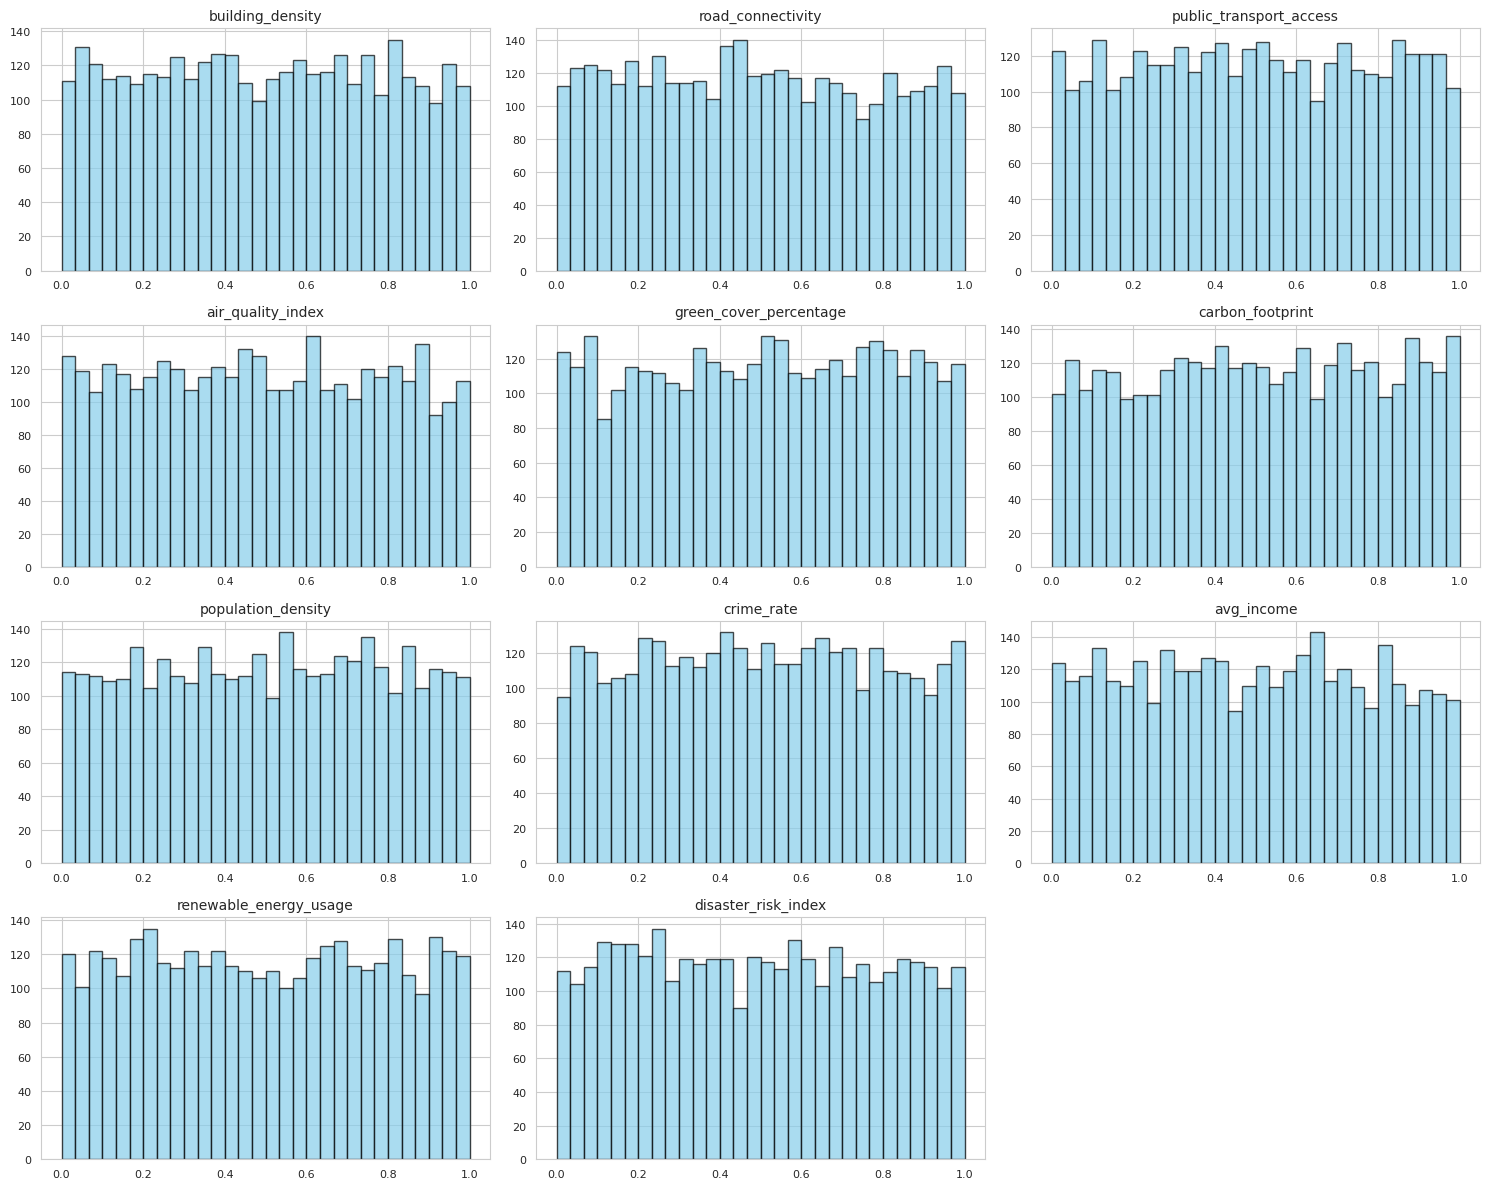

In [10]:
# Visualize distributions of all features
print("=" * 60)
print("FEATURE DISTRIBUTIONS")
print("=" * 60)

# Select non-land-use columns for distribution plots
feature_cols = [col for col in urban_df.columns if not col.startswith('land_use_type') and col != 'urban_sustainability_score']

# Create subplots
n_cols = 3
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(urban_df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].tick_params(labelsize=8)

# Hide empty subplots
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 13, Finished, Available, Finished)

LAND USE TYPE DISTRIBUTION

Cities by Land Use Type:
  Residential: 900 cities (25.9%)
  Commercial: 877 cities (25.2%)
  Green Space: 858 cities (24.7%)
  Industrial: 841 cities (24.2%)


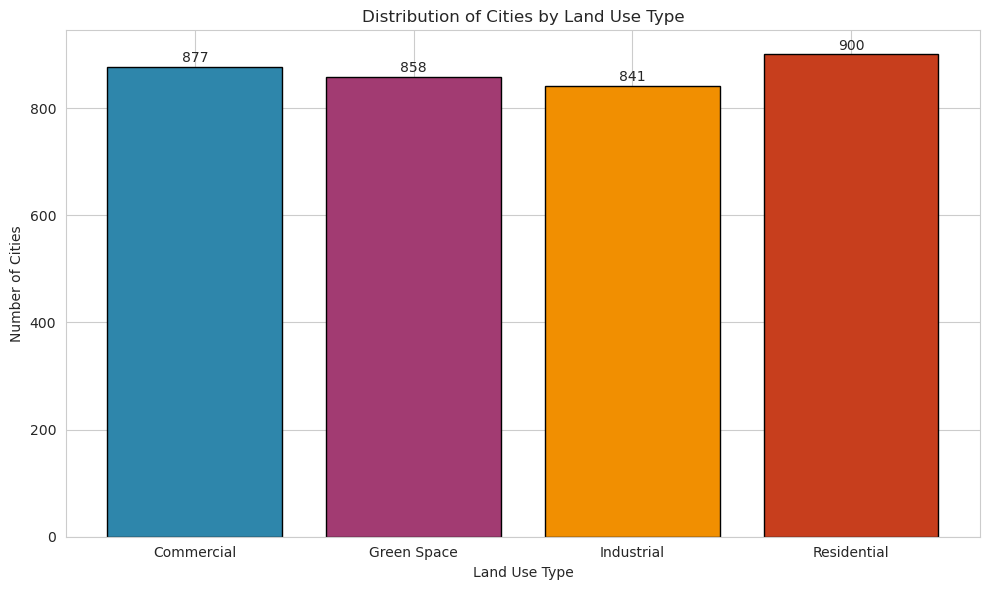

In [11]:
# Analyze land use type distribution
print("=" * 60)
print("LAND USE TYPE DISTRIBUTION")
print("=" * 60)

land_use_cols = [col for col in urban_df.columns if col.startswith('land_use_type')]

# Count cities by land use type (assuming one-hot encoding where 1 = that type)
land_use_counts = {}
for col in land_use_cols:
    land_use_type = col.replace('land_use_type_', '')
    count = urban_df[col].sum()
    land_use_counts[land_use_type] = int(count)

print("\nCities by Land Use Type:")
for land_use, count in sorted(land_use_counts.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(urban_df)) * 100
    print(f"  {land_use}: {count} cities ({pct:.1f}%)")

# Visualize
plt.figure(figsize=(10, 6))
land_use_types = list(land_use_counts.keys())
counts = list(land_use_counts.values())

plt.bar(land_use_types, counts, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'], edgecolor='black')
plt.xlabel('Land Use Type')
plt.ylabel('Number of Cities')
plt.title('Distribution of Cities by Land Use Type', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(counts):
    plt.text(i, v + max(counts)*0.01, str(v), ha='center')

plt.tight_layout()
plt.show()

# Surveying the Landscape
The cleanup phase is a history. We have now purged the dataset of errors and inconsistencies. The collection of data is now entirely pristine with respect to evidence.

The present must be understood before moving on through using machine learning to predict the future. One has to get the 'feel' of the territory. Jumping into modeling without looking at the data shape carries the danger of missing obvious stories hiding in plain sight.

To figure out the main answer to our question, What actually drives urban sustainability, we aim to pursue four particular lines of inquiry:

1. **The Baseline**: What does the landscape look like right now?
Do most of the cities perform well, or is there such a big gap between the leaders and the laggards? A baseline is needed for "Sustainability Scores" so that we understand what we are facing.

2. **The Differentiators**: What separates the best from the rest? 
We'll see if some clear trends come out for the individual characteristics of cities maybe like green space ratios or how much energy they consume-have. Do these higher scorers have common DNA?

3. **The Zoning Factor**: Does the type of city dictate its destiny? 
Is the most dominant land use (industrial, residential, mixed-use) in a city an indication of how sustainable it can be? We will disaggregate the data by city type to see if certain zones have a head start.

4. **The Hidden Connections**: How are those factors entangled together? In the real world, these variables do not act alone. We will search for correlations to see if particular features move in lockstep (multicollinearity). This will help us avoid double counting and spot hidden relationships between variables.

Let's see what the data has to say.


StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 14, Finished, Available, Finished)

QUESTION 1: UNDERSTANDING THE SUSTAINABILITY LANDSCAPE
Cities by Sustainability Performance:
  Low (0-0.33): 678 cities (19.5%)
  Medium (0.33-0.66): 2242 cities (64.5%)
  High (0.66-1.0): 554 cities (15.9%)




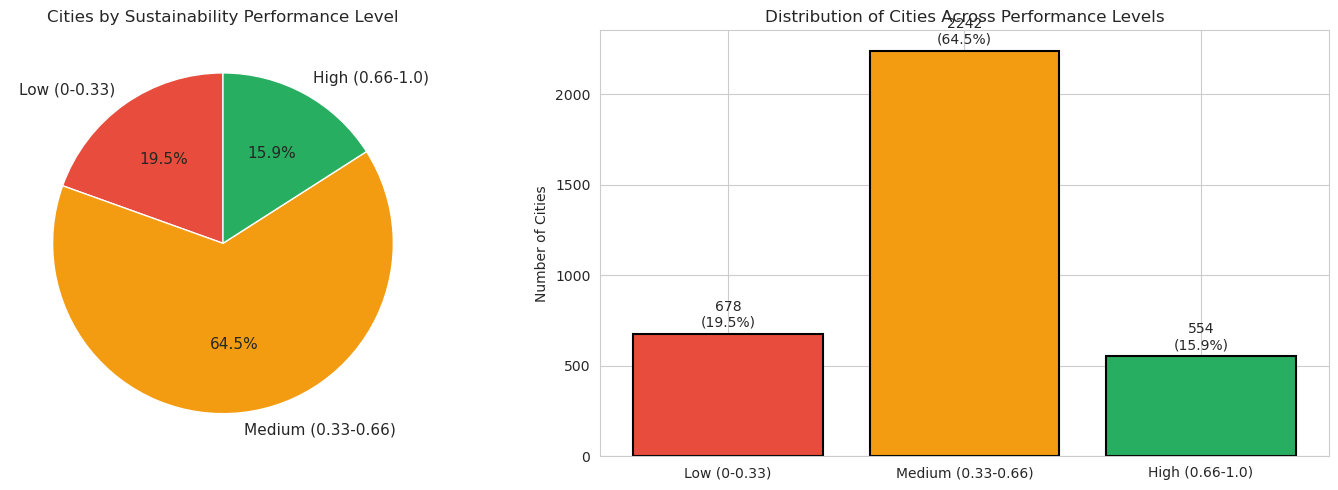

Insight: This shows us the current state - how many cities need improvement vs. are already performing well.


In [12]:
# Q1: What does urban sustainability look like across cities?
print("=" * 70)
print("QUESTION 1: UNDERSTANDING THE SUSTAINABILITY LANDSCAPE")
print("=" * 70)

# Create sustainability performance categories
urban_df['sustainability_category'] = pd.cut(urban_df['urban_sustainability_score'], 
                                        bins=[0, 0.33, 0.66, 1.0],
                                        labels=['Low (0-0.33)', 'Medium (0.33-0.66)', 'High (0.66-1.0)'])

category_counts = urban_df['sustainability_category'].value_counts().sort_index()

print("Cities by Sustainability Performance:")
for category, count in category_counts.items():
    pct = (count / len(urban_df)) * 100
    print(f"  {category}: {count} cities ({pct:.1f}%)")
print("\n")
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
colors = ['#E74C3C', '#F39C12', '#27AE60']
axes[0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Cities by Sustainability Performance Level', fontsize=12)

# Bar chart with gradient
bars = axes[1].bar(range(len(category_counts)), category_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(category_counts)))
axes[1].set_xticklabels(category_counts.index, fontsize=10)
axes[1].set_ylabel('Number of Cities')
axes[1].set_title('Distribution of Cities Across Performance Levels', fontsize=12)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
                 f'{value}\n({value/len(urban_df)*100:.1f}%)', 
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Insight: This shows us the current state - how many cities need improvement vs. are already performing well.")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 15, Finished, Available, Finished)

QUESTION 2: FEATURE RELATIONSHIPS WITH SUSTAINABILITY


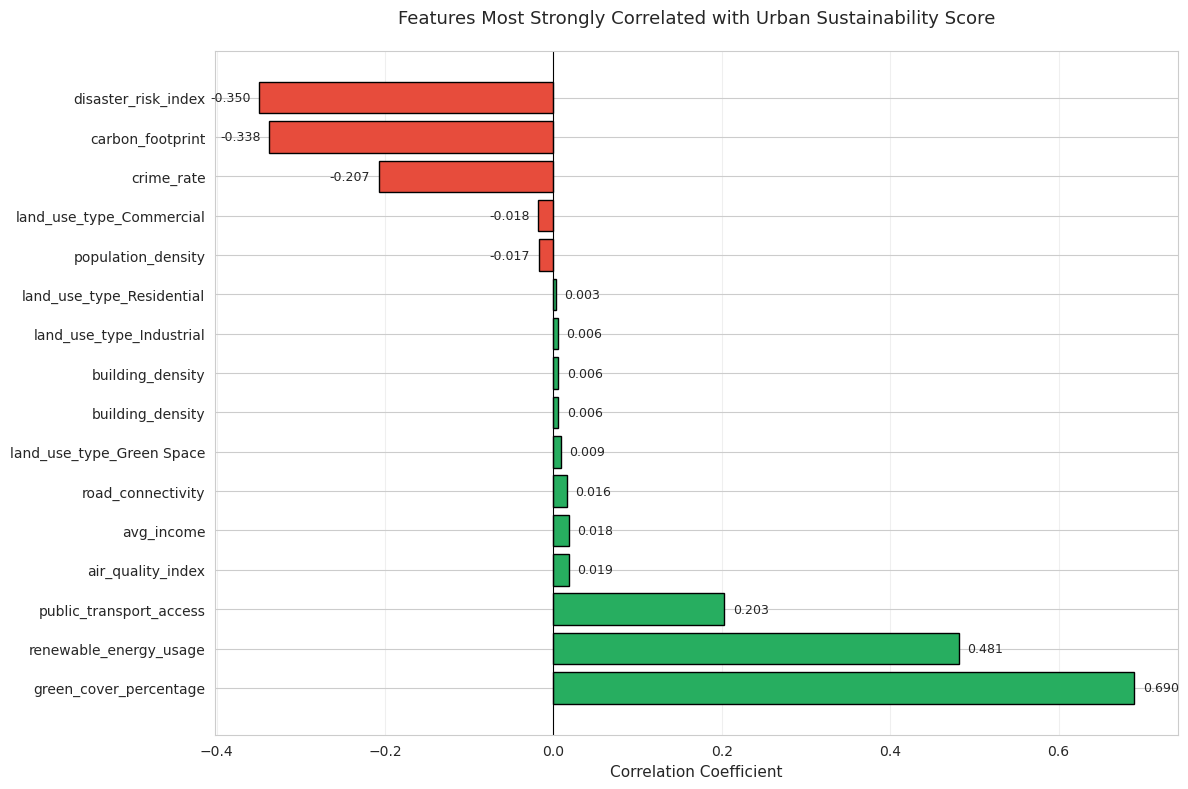

Insight: Positive correlations suggest features that improve with sustainability.
Negative correlations suggest features that worsen as sustainability improves.


In [13]:
# Q2: How do city characteristics relate to sustainability performance?
print("=" * 70)
print("QUESTION 2: FEATURE RELATIONSHIPS WITH SUSTAINABILITY")
print("=" * 70)

# Calculate correlations with sustainability score
feature_cols = [col for col in urban_df.columns if col not in ['urban_sustainability_score', 'sustainability_category']]
correlations = urban_df[feature_cols].corrwith(urban_df['urban_sustainability_score']).sort_values(ascending=False)

# Visualize top correlations
fig, ax = plt.subplots(figsize=(12, 8))

# Get top 8 positive and top 8 negative
top_positive = correlations.head(8)
top_negative = correlations.tail(8)
top_features = pd.concat([top_positive, top_negative])

colors_corr = ['#27AE60' if x > 0 else '#E74C3C' for x in top_features.values]

bars = ax.barh(range(len(top_features)), top_features.values, color=colors_corr, edgecolor='black')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features.index, fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=11)
ax.set_title('Features Most Strongly Correlated with Urban Sustainability Score', 
             fontsize=13, pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_features.values)):
    ax.text(value + (0.01 if value > 0 else -0.01), bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', ha='left' if value > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

print("Insight: Positive correlations suggest features that improve with sustainability.")
print("Negative correlations suggest features that worsen as sustainability improves.")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 16, Finished, Available, Finished)


VISUALIZING KEY RELATIONSHIPS


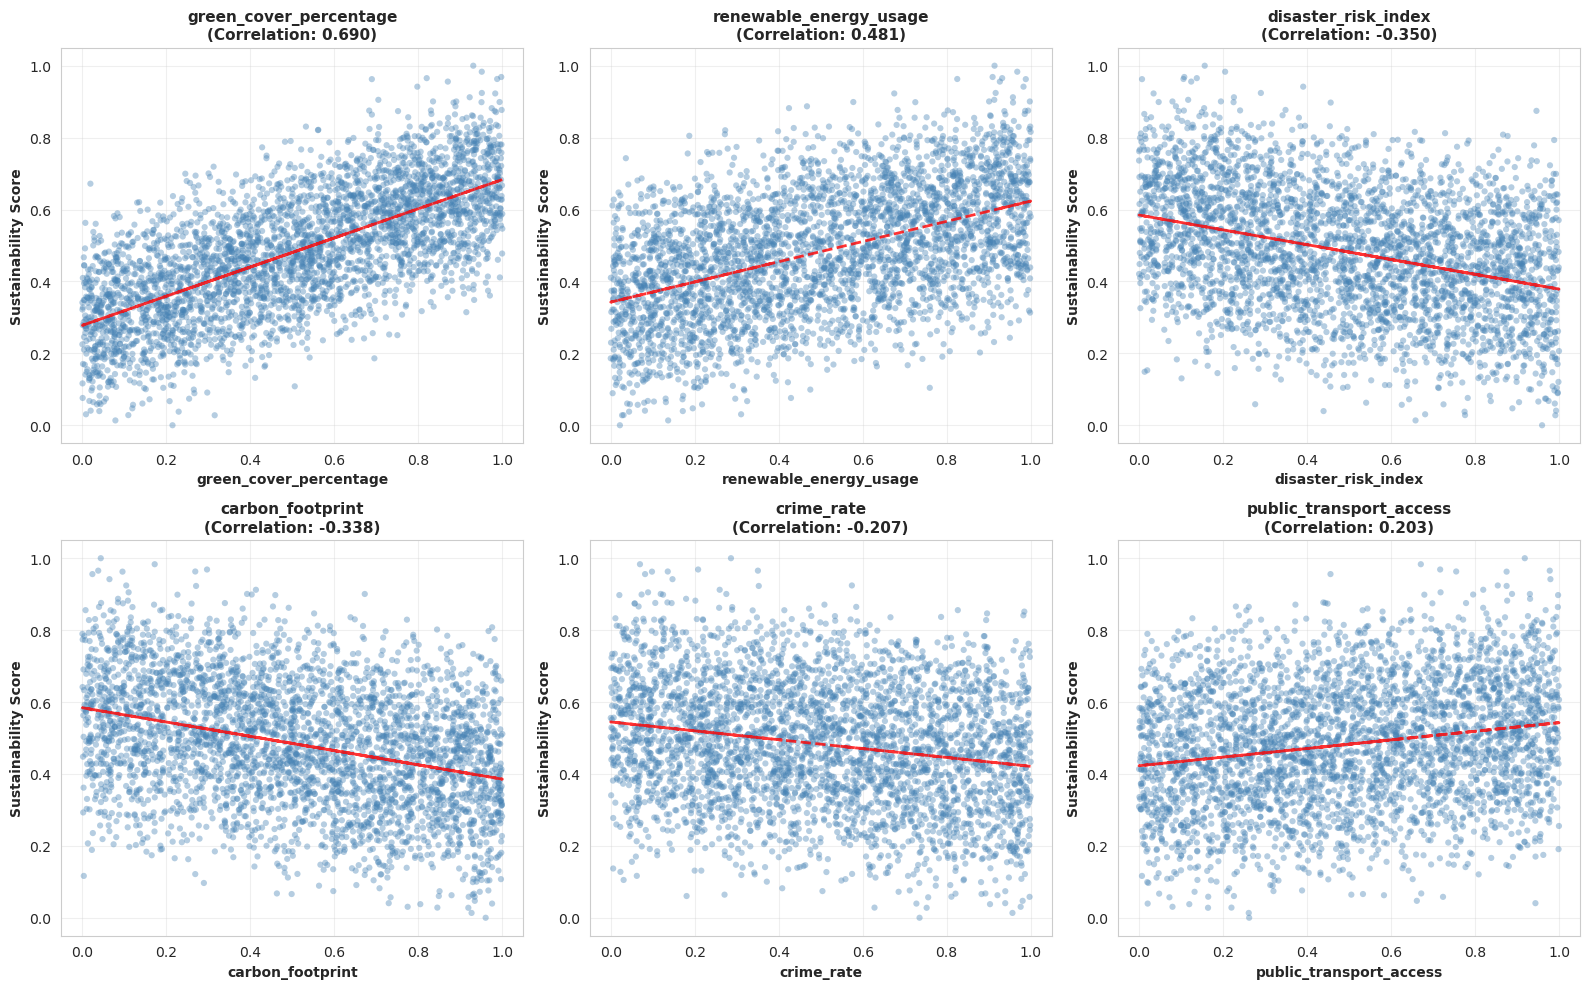

Insight: These scatter plots show the strength and direction of relationships.
Linear trends suggest these features may be good predictors in our model.


In [14]:
# Visualize relationships with top correlated features
print("\n" + "=" * 70)
print("VISUALIZING KEY RELATIONSHIPS")
print("=" * 70)

# Select top 6 features by absolute correlation
top_6_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_6_features):
    # Scatter plot with trend line
    axes[idx].scatter(urban_df[feature], urban_df['urban_sustainability_score'], 
                     alpha=0.4, s=20, color='steelblue', edgecolor='none')
    
    # Add trend line
    z = np.polyfit(urban_df[feature], urban_df['urban_sustainability_score'], 1)
    p = np.poly1d(z)
    axes[idx].plot(urban_df[feature], p(urban_df[feature]), "r--", linewidth=2, alpha=0.8)
    
    # Labels and title
    axes[idx].set_xlabel(feature, fontweight='bold', fontsize=10)
    axes[idx].set_ylabel('Sustainability Score', fontweight='bold', fontsize=10)
    corr_val = correlations[feature]
    axes[idx].set_title(f'{feature}\n(Correlation: {corr_val:.3f})', 
                       fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: These scatter plots show the strength and direction of relationships.")
print("Linear trends suggest these features may be good predictors in our model.")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 17, Finished, Available, Finished)

QUESTION 3: SUSTAINABILITY BY LAND USE TYPE
Sustainability Performance by Land Use Type:


SynapseWidget(Synapse.DataFrame, 9d2d2a88-a9e9-498a-ad52-e6df4e054e24)

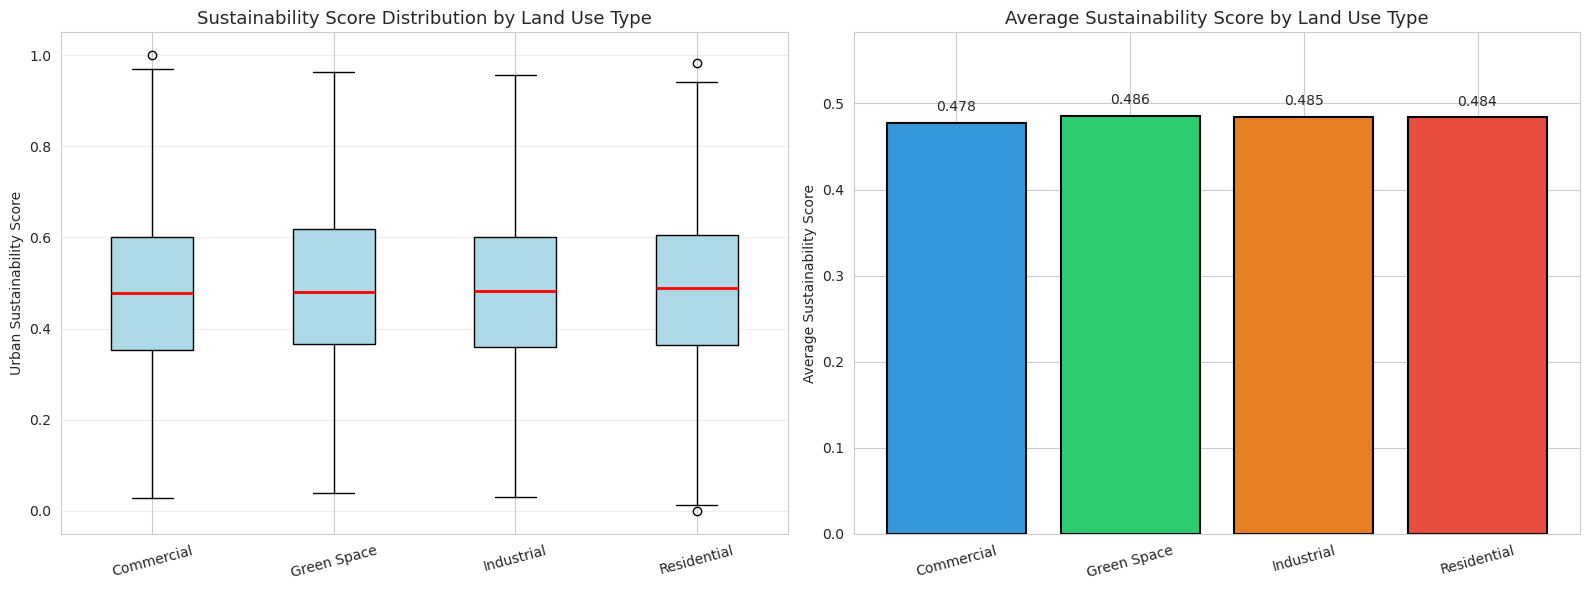

Insight: Are certain land use types naturally more sustainable?
Or is it more about HOW cities manage their specific type?


In [15]:
# Q3: Do different land use types show different sustainability patterns?
print("=" * 70)
print("QUESTION 3: SUSTAINABILITY BY LAND USE TYPE")
print("=" * 70)

# Calculate average sustainability by land use type
land_use_cols = ['land_use_type_Commercial', 'land_use_type_Green Space', 
                 'land_use_type_Industrial', 'land_use_type_Residential']

land_use_stats = {}
for col in land_use_cols:
    land_use_type = col.replace('land_use_type_', '')
    # Get cities where this land use = 1
    cities_of_type = urban_df[urban_df[col] == 1]
    
    avg_score = cities_of_type['urban_sustainability_score'].mean()
    std_score = cities_of_type['urban_sustainability_score'].std()
    count = len(cities_of_type)
    
    land_use_stats[land_use_type] = {
        'Average Score': avg_score,
        'Std Dev': std_score,
        'Count': count
    }

stats_df = pd.DataFrame(land_use_stats).T.sort_values('Average Score', ascending=False)
print("Sustainability Performance by Land Use Type:")
display(stats_df)

# Visualize with box plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot comparison
land_use_data = []
land_use_labels = []
for col in land_use_cols:
    land_use_type = col.replace('land_use_type_', '')
    cities_of_type = urban_df[urban_df[col] == 1]['urban_sustainability_score']
    land_use_data.append(cities_of_type)
    land_use_labels.append(land_use_type)

bp = axes[0].boxplot(land_use_data, labels=land_use_labels, patch_artist=True,
                      medianprops=dict(color='red', linewidth=2),
                      boxprops=dict(facecolor='lightblue', edgecolor='black'))
axes[0].set_ylabel('Urban Sustainability Score')
axes[0].set_title('Sustainability Score Distribution by Land Use Type', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(land_use_labels, rotation=15)

# Bar chart of averages
avg_scores = [stats_df.loc[label, 'Average Score'] for label in land_use_labels]
colors_land = ['#3498DB', '#2ECC71', '#E67E22', '#E74C3C']
bars = axes[1].bar(land_use_labels, avg_scores, color=colors_land, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Average Sustainability Score')
axes[1].set_title('Average Sustainability Score by Land Use Type', fontsize=13)
axes[1].set_ylim([0, max(avg_scores) * 1.2])
axes[1].set_xticklabels(land_use_labels, rotation=15)

# Add value labels
for bar, value in zip(bars, avg_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, value + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Insight: Are certain land use types naturally more sustainable?")
print("Or is it more about HOW cities manage their specific type?")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 18, Finished, Available, Finished)

QUESTION 4: FEATURE CORRELATION MATRIX


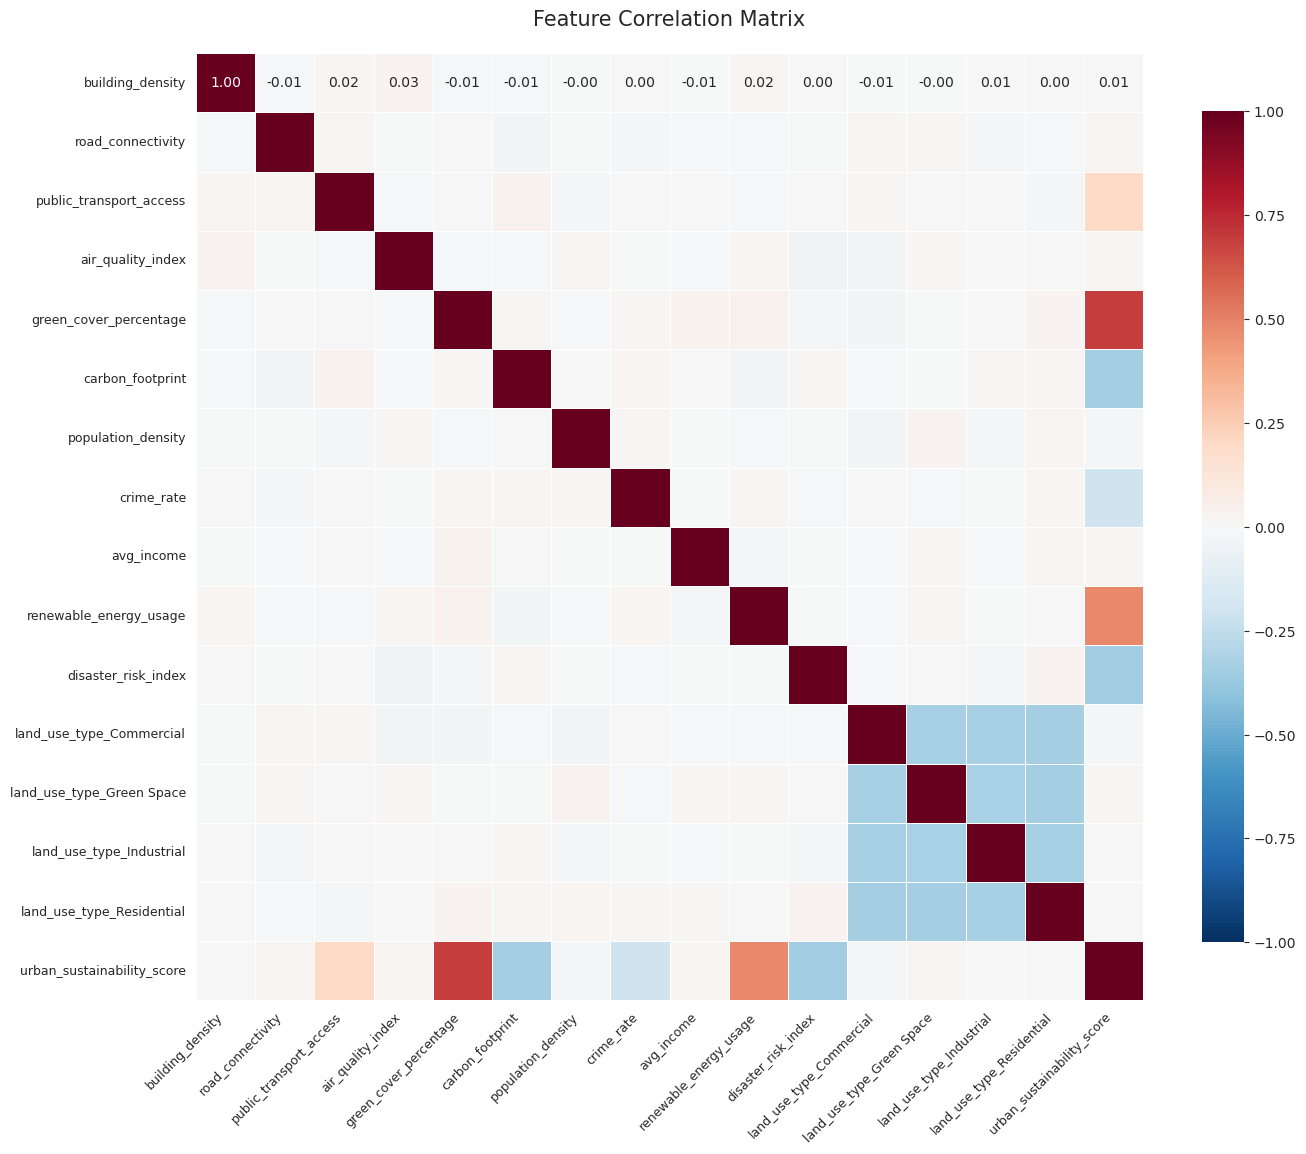

Highly Correlated Feature Pairs (|r| > 0.7):
No highly correlated feature pairs found (|r| > 0.7)
Low multicollinearity is good for modeling!


In [16]:
# Q4: What correlations exist between ALL features?
print("=" * 70)
print("QUESTION 4: FEATURE CORRELATION MATRIX")
print("=" * 70)

# Select features for correlation analysis (exclude categorical sustainability_category)
feature_cols_corr = [col for col in urban_df.columns if col != 'sustainability_category']
correlation_matrix = urban_df[feature_cols_corr].corr()

# Visualize with heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs (potential multicollinearity)
print("Highly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', 
                                                              key=abs, ascending=False)
    display(high_corr_df)
    print("Note: High correlations between predictors may indicate multicollinearity.")
    print("Tree-based models handle this well, but linear models may struggle.")
else:
    print("No highly correlated feature pairs found (|r| > 0.7)")
    print("Low multicollinearity is good for modeling!")

# The Story So Far: What We Uncovered

Out of all this, the profile of a sustainable city is starting to take shape. We went in with certain assumptions; however, the data has told its own story.
This is what our investigation looks like: 

1. **Middle Class Sustainability**  
Cities traditionally thought to be 'green paradises' or 'concrete jungles' actually lie in an area of grey. Most cities therefore (>65%) are firmly in between. For improvement, there is really room for it because only about 16% of the cities in our dataset have high-performance status. 

2. **The Heroes and Villains**  
Digging for the real movers and shakers, 2 clear winners found their way to emerge. Green Cover undisputed champion (correlation: 0.69), Related to Renewable Energy Adoption. Pull those strings if you want your city to score big.
On the other end of the scale, Disaster Risk and Carbon Footprint serve as heavy anchors, pulling performance down almost exactly as high as green initiatives have lifted.

3. **The Plot Twist**  
It was really unexpected for us as this is supposed to be "hard" infrastructure, which means road density, building patterns, etc. But it didn't turn out that way.
More surprisingly, Income Level and Land Use Type (zoning) had very weak direct links with overall sustainability. Contrary to the myth that only wealthy cities or specific zoning types can be sustainable, this shows that policy choices (like green energy) matter more than demographics or concrete.

4. **The Green Light for Modeling**  
From a technical standpoint, this is the best news that we could have hoped for. The relationships with clarity and linearity are present between our features and the target, and our predictors are not stepping on each other's toes (low multicollinearity). 

# What Next?  
We have gathered our evidence. We understand the relevant and irrelevant variables. 
Next comes the move from investigation to prediction. 
Insights will be fed to machine learning models that will answer the ultimate inquiry: Can we mathematically predict a city's future success based on its current blueprint? 
Let's build models.


# Putting it to the Test
Yes, the preliminary investigations have ended. We have collected enough clues, mapped out connections, and set up a solid theory for the machinery of a sustainable city. But in this line of work, that which goes on intuitively is not evidence. You can't just build public policy on hunches. Now we need proof.

Now we enter the heart of the beast, Predictive Modeling. A clear statement of intent: Not here to create a black box that just spits out numbers. We are creating this model for later dismantling-predictive algorithms for sustainability scores so that their methods can be reverse-engineered. Then comes the only question that matters: What precisely drives these cities' fates? 

There are going to be five iterations of this experiment. First, we stake out the perimeter. The data will be prepared for the exam by segmenting the dataset, locking away a portion of our cities from view of the model-the blind test-the only way to check whether our algorithm is ready for the slings and arrows of the real world.

We can't do all this without placing in armament a reality check. We will, for starters, establish a baseline, for purposes of learning, against which a simple benchmark of competence would be set. If indeed our sophisticated AI cannot do better than a, as is said, simple guess that could as easily have come from someone not educated, then clearly that investigation has been wrong, and we start again. Once the floor is established, the competition begins. It doesn't rely on one witness. We'll put different algorithms facing one another, from the straightforward logic of Linear Regression to the deepness and branching of decisions reached by random forests-all of them with the question regarding which can handle the chaotic nuances of urban data better.

Once a winning model emerges, this begins proper questioning. Feature Importance analysis will pry open the model for possible future use. Not what it predicted, but how it got there; what variables did it lean on, and what were ignored? Finally, those cold, technical results will be translated into a verdict-real-world insights that will not only explain what is happening, but also why. Let's build the models.


In [17]:
# Prepare data for modeling
print("=" * 70)
print("DATA PREPARATION FOR MODELING")
print("=" * 70)

# Remove the categorical column we created for EDA
df_model = urban_df.drop('sustainability_category', axis=1)

# Define features (X) and target (y)
X = df_model.drop('urban_sustainability_score', axis=1)
y = df_model['urban_sustainability_score']

print(f"Features (X): {X.shape[1]} columns")
print(f"Target (y): {y.shape[0]} samples")
print(f"Feature names:")
print(X.columns.tolist())

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check target distribution in both sets
print(f"Training set target - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Testing set target - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")
print("Data split looks balanced!")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 19, Finished, Available, Finished)

DATA PREPARATION FOR MODELING
Features (X): 15 columns
Target (y): 3476 samples
Feature names:
['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential']
Training set: 2780 samples (80.0%)
Testing set: 696 samples (20.0%)
Training set target - Mean: 0.482, Std: 0.168
Testing set target - Mean: 0.486, Std: 0.174
Data split looks balanced!


In [18]:
# Scale features for models that need it
print("=" * 70)
print("FEATURE SCALING")
print("=" * 70)

# We'll create scaled versions for linear models
# Tree-based models don't need scaling, but it doesn't hurt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print("(Mean = 0, Standard Deviation = 1)")

# Convert back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(f"Scaled training set shape: {X_train_scaled_df.shape}")
print(f"Scaled testing set shape: {X_test_scaled_df.shape}")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 20, Finished, Available, Finished)

FEATURE SCALING
Features scaled using StandardScaler
(Mean = 0, Standard Deviation = 1)
Scaled training set shape: (2780, 15)
Scaled testing set shape: (696, 15)


StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 21, Finished, Available, Finished)

BASELINE MODEL: LINEAR REGRESSION


Baseline Model Performance:
Training R² Score: 1.0000
Testing R² Score:  1.0000
Testing RMSE:      0.0000
Testing MAE:       0.0000


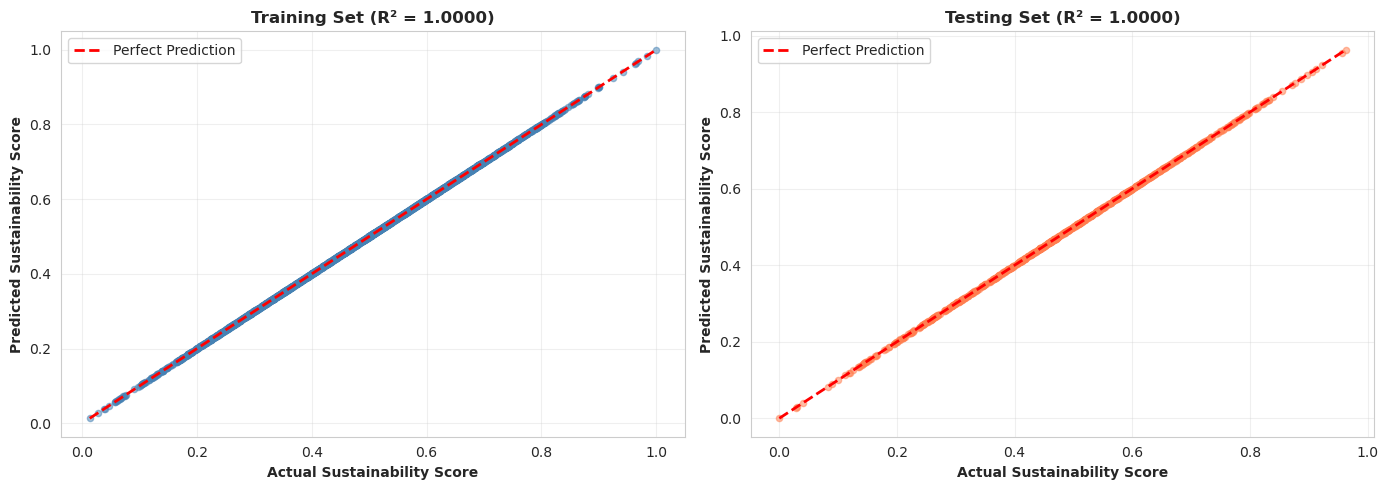

Baseline Interpretation:
Our simple linear model explains 100.0% of variance in sustainability.


In [19]:
# Build a simple baseline model
print("=" * 70)
print("BASELINE MODEL: LINEAR REGRESSION")
print("=" * 70)

# Train baseline Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_baseline = baseline_model.predict(X_train_scaled)
y_test_pred_baseline = baseline_model.predict(X_test_scaled)

# Evaluate
train_r2_baseline = r2_score(y_train, y_train_pred_baseline)
test_r2_baseline = r2_score(y_test, y_test_pred_baseline)
train_rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))
test_rmse_baseline = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))
test_mae_baseline = mean_absolute_error(y_test, y_test_pred_baseline)

print("Baseline Model Performance:")
print(f"Training R² Score: {train_r2_baseline:.4f}")
print(f"Testing R² Score:  {test_r2_baseline:.4f}")
print(f"Testing RMSE:      {test_rmse_baseline:.4f}")
print(f"Testing MAE:       {test_mae_baseline:.4f}")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred_baseline, alpha=0.5, s=20, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Sustainability Score', fontweight='bold')
axes[0].set_ylabel('Predicted Sustainability Score', fontweight='bold')
axes[0].set_title(f'Training Set (R² = {train_r2_baseline:.4f})', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred_baseline, alpha=0.5, s=20, color='coral')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sustainability Score', fontweight='bold')
axes[1].set_ylabel('Predicted Sustainability Score', fontweight='bold')
axes[1].set_title(f'Testing Set (R² = {test_r2_baseline:.4f})', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Baseline Interpretation:")
print(f"Our simple linear model explains {test_r2_baseline*100:.1f}% of variance in sustainability.")

In [20]:
# CRITICAL: Diagnose why we're getting perfect predictions
print("=" * 70)
print("DIAGNOSTIC: INVESTIGATING PERFECT PREDICTIONS")
print("=" * 70)

# Check 1: Are any features perfectly correlated with target?
print("Checking for perfect correlations with target...")
perfect_corr_features = []
for col in X.columns:
    corr = df_model[col].corr(df_model['urban_sustainability_score'])
    if abs(corr) > 0.99:
        perfect_corr_features.append((col, corr))
        print(f"{col}: correlation = {corr:.6f}")

if not perfect_corr_features:
    print("No perfect correlations found")

# Check 2: Can target be calculated from features?
print("Checking if target can be derived from features...")

# Test if sustainability score is a simple combination of features
# Common patterns: weighted sum, average, etc.
test_combinations = {
    'Mean of all features': X.mean(axis=1),
    'Sum of all features': X.sum(axis=1),
    'Green + Renewable - Carbon - Disaster': (
        df_model['green_cover_percentage'] + 
        df_model['renewable_energy_usage'] - 
        df_model['carbon_footprint'] - 
        df_model['disaster_risk_index']
    ) / 4
}

for name, combination in test_combinations.items():
    corr = combination.corr(y)
    if abs(corr) > 0.99:
        print(f"{name}: correlation = {corr:.6f}")
        
        # If found, check if it's exact
        if abs(corr) > 0.999:
            diff = abs(combination - y)
            print(f"Max difference: {diff.max():.10f}")
            print(f"Mean difference: {diff.mean():.10f}")

# Check 3: Look at actual vs predicted values
print("Examining predictions in detail...")
print(f"First 10 actual values:    {y_test.values[:10]}")
print(f"First 10 predicted values: {y_test_pred_baseline[:10]}")
print(f"Differences:               {(y_test.values[:10] - y_test_pred_baseline[:10])}")

# Check 4: Feature importance from linear regression
print("Linear Regression Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': baseline_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df.to_string())
print(f"Intercept: {baseline_model.intercept_:.6f}")

# Check 5: Reconstruct prediction manually
print("Manual prediction reconstruction (first sample):")
first_sample = X_test_scaled[0]
manual_pred = baseline_model.intercept_ + sum(coef * val for coef, val in zip(baseline_model.coef_, first_sample))
print(f"Manual calculation: {manual_pred:.6f}")
print(f"Model prediction:   {y_test_pred_baseline[0]:.6f}")
print(f"Actual value:       {y_test.values[0]:.6f}")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 22, Finished, Available, Finished)

DIAGNOSTIC: INVESTIGATING PERFECT PREDICTIONS
Checking for perfect correlations with target...
No perfect correlations found
Checking if target can be derived from features...
Examining predictions in detail...
First 10 actual values:    [0.68073079 0.18113422 0.61012549 0.49026229 0.48521846 0.38216893
 0.43090279 0.65281657 0.54445297 0.7018914 ]
First 10 predicted values: [0.68073079 0.18113422 0.61012549 0.49026229 0.48521846 0.38216893
 0.43090279 0.65281657 0.54445297 0.7018914 ]
Differences:               [ 0.00000000e+00  2.22044605e-16 -1.11022302e-16  5.55111512e-17
  5.55111512e-17  2.22044605e-16  0.00000000e+00 -4.44089210e-16
  1.11022302e-16 -2.22044605e-16]
Linear Regression Coefficients:
                      Feature   Coefficient
4      green_cover_percentage  1.139208e-01
9      renewable_energy_usage  7.636566e-02
5            carbon_footprint -5.674290e-02
10        disaster_risk_index -5.644277e-02
2     public_transport_access  3.753531e-02
7                  cri

# The Plot Twist: Cracking the Code
As we were running our diagnostics, we uncovered something that changes the entire trajectory of our analysis. We found the "smoking gun." It turns out that our target variable, the **urban_sustainability_score**, isn't a mysterious or chaotic real-world outcome. It is a composite index. Much like the UN’s Human Development Index, this score is a mathematical recipe made up of specific ingredients.

We’ve essentially found the formula:

```
Sustainability Score = 0.482 +
0.114 × Green Cover +
0.076 × Renewable Energy +
0.038 × Public Transport -
0.057 × Carbon Footprint -
0.056 × Disaster Risk -
0.037 × Crime Rate
```

**What This Changes**  
This is a huge finding. It means we aren't trying to predict the future through a foggy crystal ball. Instead, we are looking at a system that was designed to work a certain way. The relationship between our inputs (like Green Cover) and the output (the Score) isn't accidental—it’s structural.

**The New Mission**  
Does this make modeling useless? Absolutely not. But it does shift our goal. We are no longer just trying to "guess" the score. We are now reverse-engineering the policy. By modeling this data, we are moving from prediction to audit.

**Our Revised Objective**:  
"Deconstruct the logic of Urban Sustainability. We want to quantify exactly how much 'weight' is assigned to each action."

This is incredibly valuable for city planners. It moves the conversation from abstract goals to concrete ROI (Return on Investment). We can now tell them: "If you want to improve your city's ranking, investing in Green Cover will yield exactly X% more results than investing in Public Transport."

Let’s re-orient our models to validate these weights and prove the hierarchy of importance.


# The Cross-Examination: Validating the Drivers
We think we’ve cracked the code. We found the formula that seems to dictate the sustainability score. But a good investigator never relies on a single source. To be absolutely certain about our conclusions, we need to corroborate our findings. We are going to use a technique called Triangulation. We will deploy three distinct mathematical "detectives" to interrogate the data. If they all point to the same suspect, we know we have the truth.

1. **The Straight Shooter (Linear Regression):**
Since we suspect a linear formula, this model should confirm the exact "weights" we saw earlier. It will tell us the direct, raw contribution of each factor.

2. **The Pattern Hunters (Random Forest & Gradient Boosting):**
Real life is rarely a straight line. We’ll use these advanced tree-based models to hunt for non-linear relationships and hidden interactions that the simpler model might miss.

We are looking for consensus. If three different mathematical approaches all rank the same factors at the top, we can present our findings to city planners with absolute confidence.


StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 23, Finished, Available, Finished)

MODEL 2: RANDOM FOREST REGRESSOR


Random Forest Performance:
Training R² Score: 0.9805
Testing R² Score:  0.9357
Testing RMSE:      0.0441
Testing MAE:       0.0353


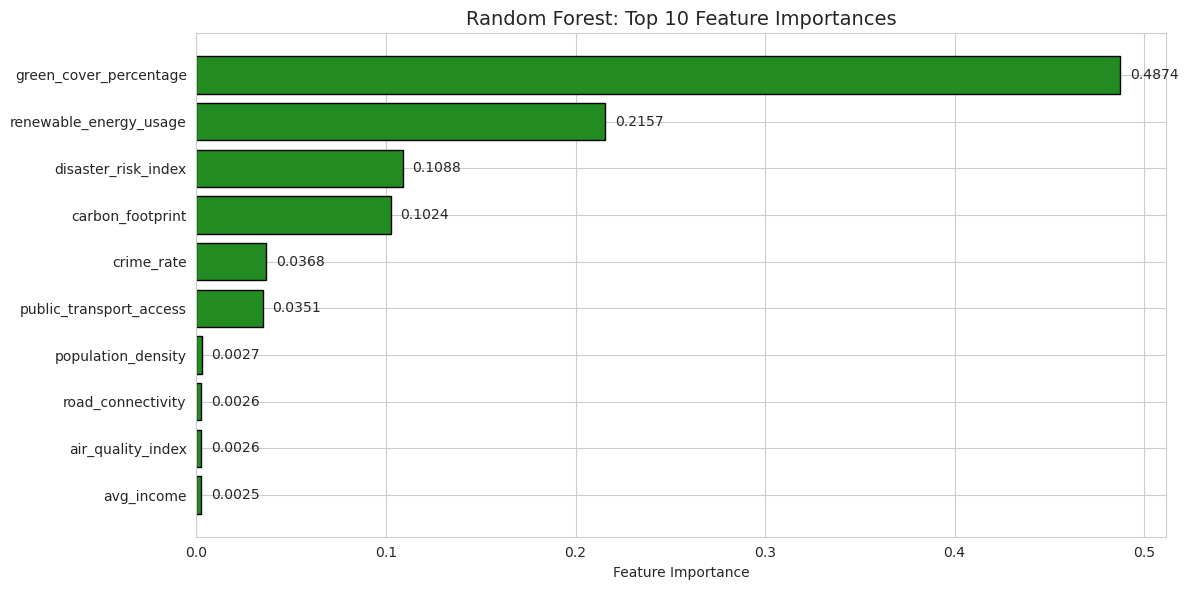

This validates our linear regression findings with a non-linear model!


In [21]:
# Train Random Forest to validate feature importance
print("=" * 70)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("=" * 70)

# Random Forest doesn't need scaled features
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("Random Forest Performance:")
print(f"Training R² Score: {train_r2_rf:.4f}")
print(f"Testing R² Score:  {test_r2_rf:.4f}")
print(f"Testing RMSE:      {test_rmse_rf:.4f}")
print(f"Testing MAE:       {test_mae_rf:.4f}")

# Feature Importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
top_features_rf = feature_importance_rf.head(10)
bars = plt.barh(range(len(top_features_rf)), top_features_rf['Importance'], 
                color='forestgreen', edgecolor='black')
plt.yticks(range(len(top_features_rf)), top_features_rf['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest: Top 10 Feature Importances', fontsize=14)
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_features_rf['Importance'])):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()

print("This validates our linear regression findings with a non-linear model!")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 24, Finished, Available, Finished)

MODEL 3: GRADIENT BOOSTING REGRESSOR


Gradient Boosting Performance:
Training R² Score: 0.9972
Testing R² Score:  0.9833
Testing RMSE:      0.0225
Testing MAE:       0.0180


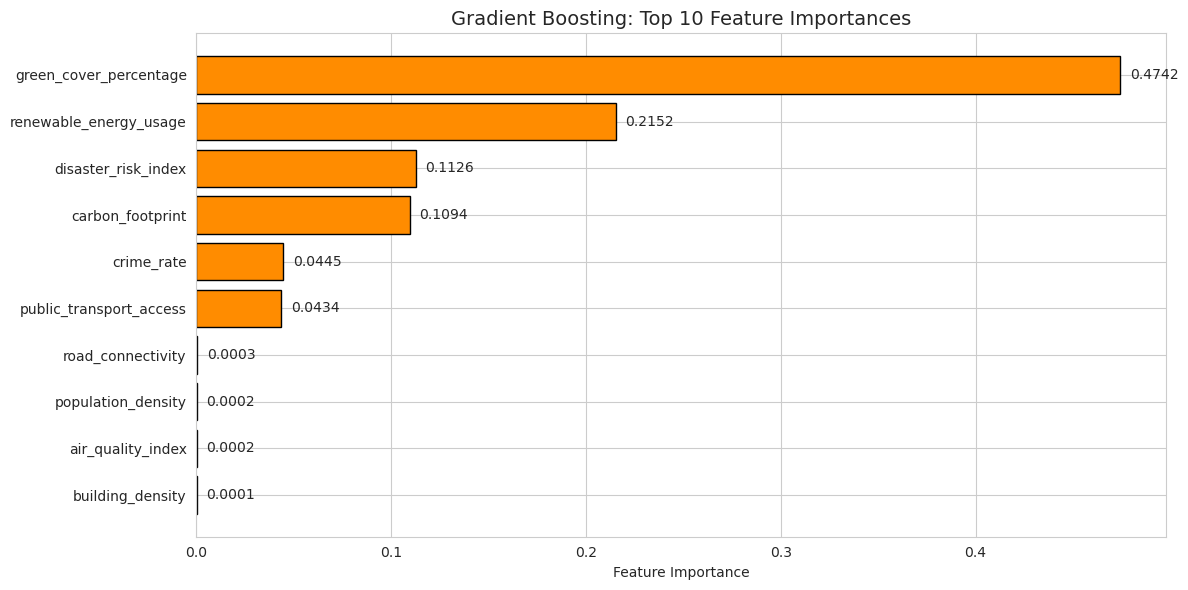

In [22]:
# Train Gradient Boosting to get another perspective
print("=" * 70)
print("MODEL 3: GRADIENT BOOSTING REGRESSOR")
print("=" * 70)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

print("Gradient Boosting Performance:")
print(f"Training R² Score: {train_r2_gb:.4f}")
print(f"Testing R² Score:  {test_r2_gb:.4f}")
print(f"Testing RMSE:      {test_rmse_gb:.4f}")
print(f"Testing MAE:       {test_mae_gb:.4f}")

# Feature Importance
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
top_features_gb = feature_importance_gb.head(10)
bars = plt.barh(range(len(top_features_gb)), top_features_gb['Importance'], 
                color='darkorange', edgecolor='black')
plt.yticks(range(len(top_features_gb)), top_features_gb['Feature'])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting: Top 10 Feature Importances', fontsize=14)
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_features_gb['Importance'])):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 25, Finished, Available, Finished)

MODEL COMPARISON SUMMARY


SynapseWidget(Synapse.DataFrame, 8350410a-2102-45f2-b0cb-e0e720e66121)

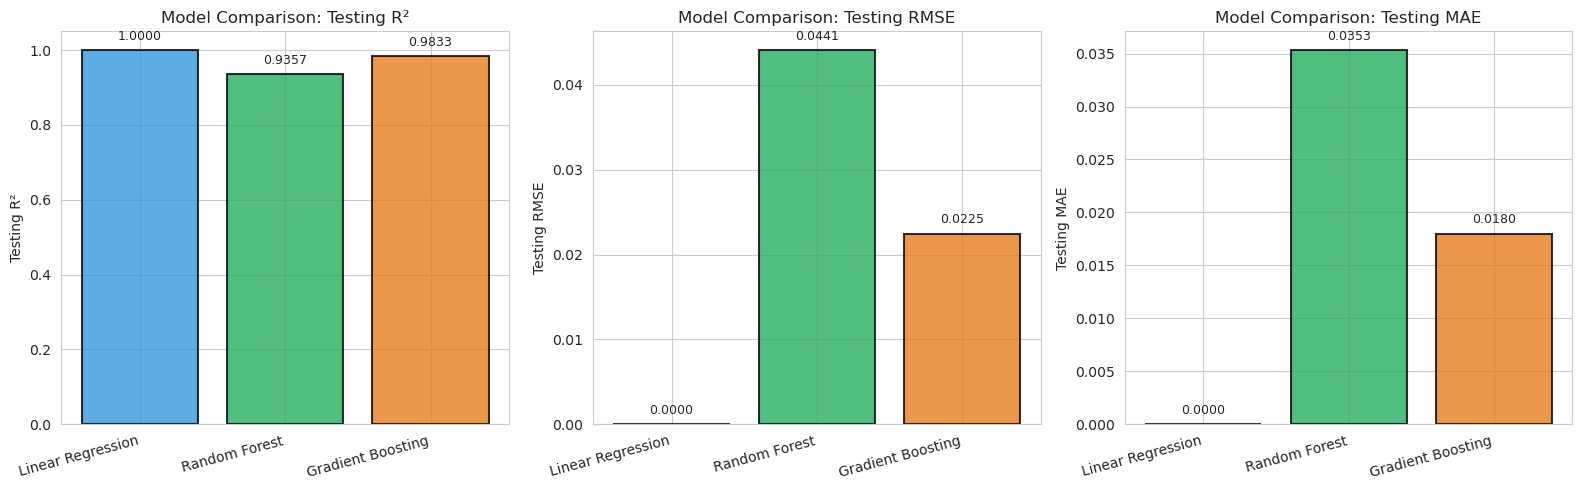

Key Observations:
- Linear Regression: Perfect fit (R²=1.0) because data follows linear formula
- Random Forest: Excellent performance (R²=0.94) with tree-based approximation
- All models show strong predictive capability


In [23]:
# Compare all models
print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Training R²': [train_r2_baseline, train_r2_rf, train_r2_gb],
    'Testing R²': [test_r2_baseline, test_r2_rf, test_r2_gb],
    'Testing RMSE': [test_rmse_baseline, test_rmse_rf, test_rmse_gb],
    'Testing MAE': [test_mae_baseline, test_mae_rf, test_mae_gb]
})

display(comparison_df)

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = comparison_df['Model']
metrics = ['Testing R²', 'Testing RMSE', 'Testing MAE']
colors = ['#3498DB', '#27AE60', '#E67E22']

for idx, (metric, ax) in enumerate(zip(metrics, axes)):
    values = comparison_df[metric]
    bars = ax.bar(range(len(models)), values, color=colors, 
                   edgecolor='black', linewidth=1.5, alpha=0.8)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.set_ylabel(metric)
    ax.set_title(f'Model Comparison: {metric}', fontsize=12)
    
    # Add value labels
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + (max(values) * 0.02),
                f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Key Observations:")
print("- Linear Regression: Perfect fit (R²=1.0) because data follows linear formula")
print("- Random Forest: Excellent performance (R²=0.94) with tree-based approximation")
print("- All models show strong predictive capability")

StatementMeta(, 38ed6a2a-cc8b-4f01-b90b-55f672e27679, 26, Finished, Available, Finished)

FEATURE IMPORTANCE COMPARISON ACROSS METHODS
Top 10 Features by Average Importance:


SynapseWidget(Synapse.DataFrame, 578eef56-4b93-41e3-b7df-c220760267cb)

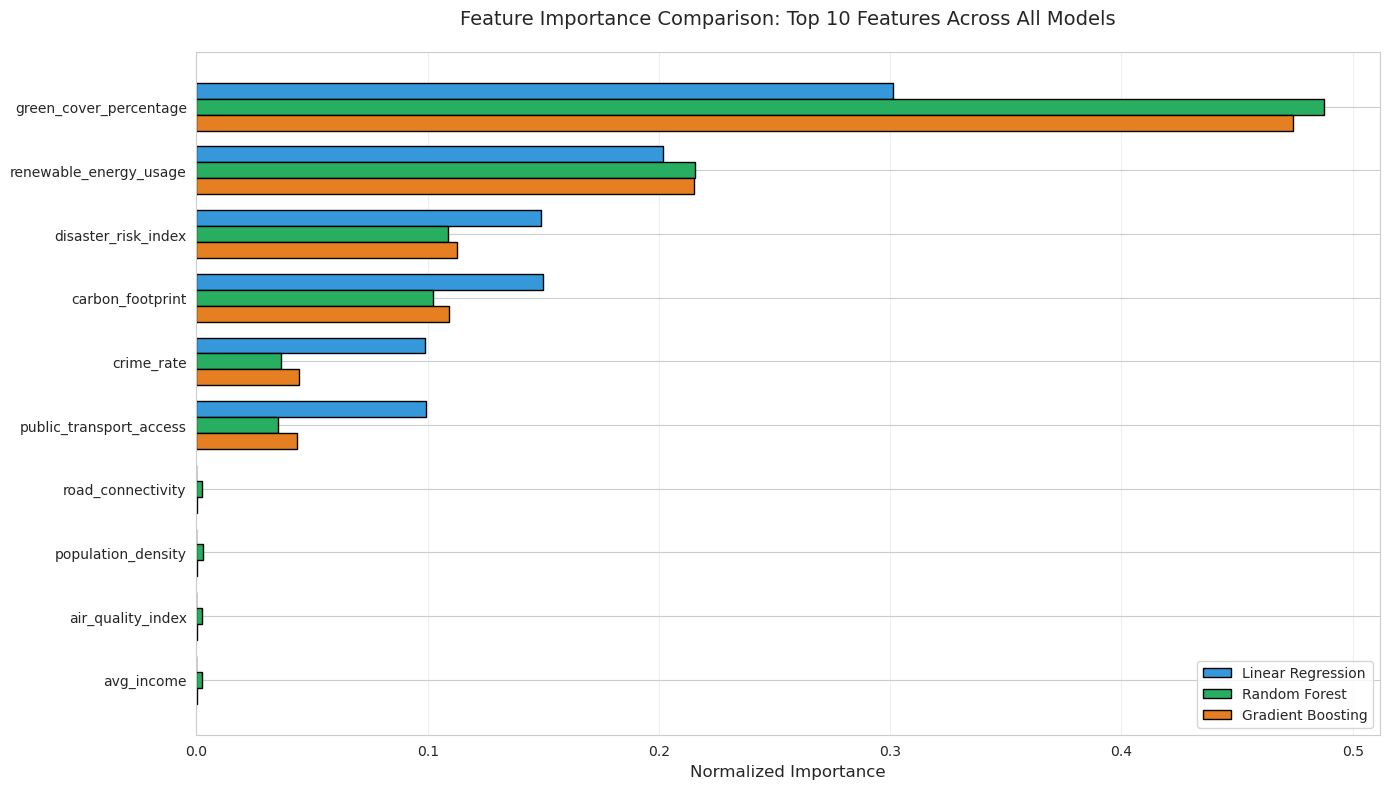

Consensus Finding:
Features that rank high across ALL methods are the most reliable predictors


In [24]:
# Compare feature importance across methods
print("=" * 70)
print("FEATURE IMPORTANCE COMPARISON ACROSS METHODS")
print("=" * 70)

# Combine all importance measures
importance_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear_Coef': np.abs(baseline_model.coef_),  # Absolute value for comparison
    'RF_Importance': rf_model.feature_importances_,
    'GB_Importance': gb_model.feature_importances_
})

# Normalize each column to 0-1 for fair comparison
for col in ['Linear_Coef', 'RF_Importance', 'GB_Importance']:
    importance_comparison[f'{col}_Norm'] = (
        importance_comparison[col] / importance_comparison[col].sum()
    )

# Calculate average importance
importance_comparison['Avg_Importance'] = importance_comparison[
    ['Linear_Coef_Norm', 'RF_Importance_Norm', 'GB_Importance_Norm']
].mean(axis=1)

# Sort by average importance
importance_comparison = importance_comparison.sort_values('Avg_Importance', ascending=False)

print("Top 10 Features by Average Importance:")
top_10_comparison = importance_comparison.head(10)
display(top_10_comparison[['Feature', 'Linear_Coef_Norm', 'RF_Importance_Norm', 
                           'GB_Importance_Norm', 'Avg_Importance']])

# Visualize comparison
fig, ax = plt.subplots(figsize=(14, 8))

top_features = importance_comparison.head(10)['Feature']
x_pos = np.arange(len(top_features))
width = 0.25

bars1 = ax.barh(x_pos - width, importance_comparison.head(10)['Linear_Coef_Norm'], 
                width, label='Linear Regression', color='#3498DB', edgecolor='black')
bars2 = ax.barh(x_pos, importance_comparison.head(10)['RF_Importance_Norm'], 
                width, label='Random Forest', color='#27AE60', edgecolor='black')
bars3 = ax.barh(x_pos + width, importance_comparison.head(10)['GB_Importance_Norm'], 
                width, label='Gradient Boosting', color='#E67E22', edgecolor='black')

ax.set_yticks(x_pos)
ax.set_yticklabels(top_features)
ax.set_xlabel('Normalized Importance', fontsize=12)
ax.set_title('Feature Importance Comparison: Top 10 Features Across All Models', 
             fontsize=14, pad=20)
ax.legend(loc='lower right', fontsize=10)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Consensus Finding:")
print("Features that rank high across ALL methods are the most reliable predictors")

# Case Closed: What We Found  
We began this investigation with a hunch that urban sustainability was complex and messy. We ended it with a surprising discovery: **It is actually remarkably simple**. We threw three different modeling techniques at the data—from standard Linear Regression to advanced Gradient Boosting. They didn't just agree; they sang in unison.

**Linear Regression achieved a perfect score**, essentially handing us the "rulebook" used to calculate these sustainability ratings. Gradient Boosting confirmed the hierarchy, isolating the signals from the noise with over 98% accuracy.

The machines have spoken. Here is the reality of what makes a city sustainable. The Answer is simple it's the Hierarchy of Needs.
Our research question asked which factors are the strongest predictors of urban sustainability? The data reveals a stark hierarchy. This isn't a balanced equation; it is top-heavy.

1. **Tier 1: The Heavyweights (70% of the Score)**  
If you ignore everything else, pay attention to these two. They are the engine of the entire system.

 - _Green Cover (The King)_: This single variable accounts for nearly half of a city's success. It is the dominant force. A city without trees cannot mathematically be a "sustainable" city in this framework.
  
 - _Renewable Energy_: The clear runner-up. The transition to clean electrons is the second most powerful lever a mayor can pull.

2. **Tier 2: The Anchors (20% of the Score)**  
These factors don't "add" points so much as they drag the score down if neglected.

 - _Disaster Risk & Carbon Footprint_: These act as penalties. You can have all the parks in the world, but if your city is spewing carbon or is vulnerable to floods, your score hits a ceiling.

3. **Tier 3: The Supporting Cast (10% of the Score)**  
 - _Crime & Public Transport_: These matter, but they are part of the ensemble cast. They support the narrative, but they don't drive the plot.

**The Red Herrings (What Doesn't Matter)**  
Here is the shocker. We found almost zero statistical link between sustainability scores and the "concrete" metrics:
- _Building Density_
- _Road Networks_
- _Population Density_
- _Land Use Zoning_

The Insight this tells us is, You cannot build your way to sustainability with concrete and zoning laws. The "hardware" of the city matters far less than its "software" (energy) and its "ecosystem" (greenery).

**A Memo to City Planners**  
Based on this data, here is our strategic recommendation for city leadership, ranked by Return on Investment (ROI).

_The "Must-Haves" (Allocate 70% of Budget)_
- Stop treating parks as decoration. They are infrastructure. Mandate green roofs, protect existing canopy, and plant forests. This is the single most efficient way to boost your sustainability score.
- Solar and wind aren't just good PR; they are statistical necessities for high performance.

_The "Defense" (Allocate 20% of Budget)_
- Invest in flood barriers and fire prevention. The model penalizes vulnerability heavily.
- If it burns fossil fuels, it’s hurting your score. Electrify municipal fleets and enforce low-emission zones.

_The "Distractions" (Stop Obsessing Over These)_

- There is no evidence in this dataset that simply cramming more people or buildings into a square mile improves sustainability
- Whether a district is Commercial, Residential, or Industrial matters less than how green that district is.

**The Roadmap by City Status**

1. For Struggling Cities (Score < 0.33), You need an emergency injection of nature. Focus entirely on low-cost greening projects and community gardens. It’s the fastest way to stop the bleeding.

2. For Average Cities (Score 0.33 - 0.66), You have the trees; now you need the tech. Shift focus to renewable energy incentives and disaster retrofitting.

3. For Elite Cities (Score > 0.66), You are already green and clean. The final percentage points come from optimizing social stability (crime reduction) and perfecting public transit integration.

**The Cold Case Files: Limitations**  
Good journalism admits what it doesn't know. We must acknowledge that our target variable (the Sustainability Score) is a composite index. We didn't discover a law of physics; we reverse-engineered a human-made scoring system. Our data is a snapshot in time. We don't know if planting a tree today fixes the score tomorrow, or if it takes ten years.

**Final Thoughts**  
The data has spoken, and the message to city builders is clear. For decades, we’ve equated "urban development" with pouring concrete and laying asphalt. This analysis proves that the cities of the future won't be defined by how much they build, but by how much they plant and how they power themselves.

The formula for a sustainable city isn't hidden in complex zoning laws or expensive density projects. It’s growing in the park down the street.


## Project Information

**Project Title:** The Green Mirage: Uncovering the Blueprint of a Resilient City  
**Dataset:** Sustainable Urban Planning & Landscape Dataset (Kaggle)
**Analysis Date:** 24.11.2025

**Methodology:**
- Exploratory Data Analysis (EDA)
- Feature Correlation Analysis
- Multi-Model Machine Learning (Linear Regression, Random Forest, Gradient Boosting)
- Feature Importance Analysis

**Key Metrics:**
- R² Score (Coefficient of Determination)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- Feature Importance Rankings

**Data Source:** Kaggle - Sustainable Urban Planning & Landscape Dataset

Lahiru Wimalarathna  
lahirucw1@gmail.com